In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data from the TestDataset/dataset_extract.csv
test_data = pd.read_csv('../TestDataset/dataset_extract.csv')
test_data.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk,fall_adl_bin
0,0,115.024493,24.741781,612.155707,19.252090,5.153206,82.560319,-61.042769,143.603087,17.059250,...,4.636462,3.991397,2.015713,3.532227,-2.659478,6.191706,0.767666,0.589311,0.246427,1.0
1,1,117.711772,16.768012,281.166228,4.236920,1.884415,89.751237,-58.436630,148.187867,14.200206,...,3.322654,3.244466,1.231510,1.385561,-2.494360,3.879921,0.540023,0.291625,0.188081,1.0
2,2,115.109201,14.239560,202.765078,8.481138,4.228995,58.012593,-62.690430,120.703023,10.882919,...,3.546517,2.574878,1.164197,2.636321,-3.712825,6.349147,0.815085,0.664364,0.247422,1.0
3,3,126.852948,14.902969,222.098498,6.632980,3.276836,73.356606,-110.498406,183.855012,14.259771,...,1.972748,1.722881,0.686246,3.264160,-3.181417,6.445577,0.657970,0.432925,0.201116,1.0
4,4,135.883543,22.889379,523.923658,11.711906,5.950308,118.347070,-54.881210,173.228280,18.794910,...,4.029638,3.225962,0.829688,2.178181,-2.062997,4.241178,0.674245,0.454606,0.211749,1.0


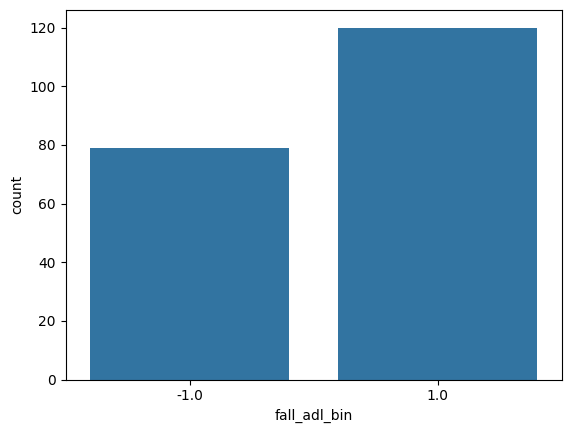

In [4]:
# Plot count of fall_adl_bin
sns.countplot(x='fall_adl_bin', data=test_data)
plt.show()

In [8]:
# Plot data by person_id and fall_adl_bin
# sns.countplot(x='person_id', hue='fall_adl_bin', data=test_data)
# plt.show()

test_data.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk,fall_adl_bin
0,0,115.024493,24.741781,612.155707,19.252090,5.153206,82.560319,-61.042769,143.603087,17.059250,...,4.636462,3.991397,2.015713,3.532227,-2.659478,6.191706,0.767666,0.589311,0.246427,1.0
1,1,117.711772,16.768012,281.166228,4.236920,1.884415,89.751237,-58.436630,148.187867,14.200206,...,3.322654,3.244466,1.231510,1.385561,-2.494360,3.879921,0.540023,0.291625,0.188081,1.0
2,2,115.109201,14.239560,202.765078,8.481138,4.228995,58.012593,-62.690430,120.703023,10.882919,...,3.546517,2.574878,1.164197,2.636321,-3.712825,6.349147,0.815085,0.664364,0.247422,1.0
3,3,126.852948,14.902969,222.098498,6.632980,3.276836,73.356606,-110.498406,183.855012,14.259771,...,1.972748,1.722881,0.686246,3.264160,-3.181417,6.445577,0.657970,0.432925,0.201116,1.0
4,4,135.883543,22.889379,523.923658,11.711906,5.950308,118.347070,-54.881210,173.228280,18.794910,...,4.029638,3.225962,0.829688,2.178181,-2.062997,4.241178,0.674245,0.454606,0.211749,1.0


<Axes: xlabel='fall_adl_bin', ylabel='count'>

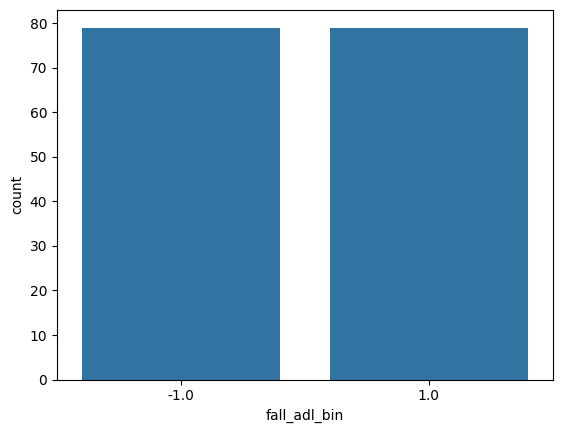

In [21]:
# Delete randomly samples of fall_adl_bin = 1.0 until the count of fall_adl_bin = 0.0 is equal to the count of fall_adl_bin = 1.0
diff = test_data['fall_adl_bin'].value_counts()[1.0] - test_data['fall_adl_bin'].value_counts()[-1.0]
# Delete randomly diff samples of fall_adl_bin = 1.0
for i in range(diff):
	index = test_data[test_data['fall_adl_bin'] == 1.0].sample().index
	test_data.drop(index, inplace=True)
# Plot
sns.countplot(x='fall_adl_bin', data=test_data)

In [22]:
# Save to csv
test_data.to_csv('test_extracted_balanced.csv', index=False)